<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_07_python_voor_data_science_correctversie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labo 7 - Python voor data science
Het doel van dit labo is dat je kan:
 - filteren met meerdere condities.
 - kolommen toevoegen, verwijderen en bewerken.
 - zelf in de documentatie eenvoudige functies leren gebruiken.
 - kijken of de data normaalverdeeld is.
 - uitschieters opsporen en verwijderen uit een dataset.

Gegeven is het bestand 'movies.csv' die de IMDB 5000 dataset bevat. Deze dataset bevat gegevens (afkomstig van imdb.com) over meer dan 5000 films.
Gebruik Python met bijhorende libraries om de onderstaande vragen uit te werken en te beantwoorden.



Een beschrijving van de verschillende variabelen kan je hieronder vinden:

| Variable Name |Description |
| --- | --- |
|movie_title 	|Title of the Movie |
| duration |	Duration in minutes |
|director_name |	Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name 	|Other actor starring in the movie|
|actor_2_facebook_likes |	Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users 	|Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color 	|Film colorization. ‘Black and White’ or ‘Color’|
|title_year 	| The year in which the movie is released (1916:2016)
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [2]:
# Importeren van de dataset
dataset = pd.read_csv('movies.csv',sep=',')

In [3]:
# Toon de eerste 10 rijen
dataset.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,Action
6,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,Adventure
7,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,Action
8,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,Adventure
9,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,Action


Hoeveel films steken in de dataset?

In [4]:
movie = dataset['movie_title']
len(movie)


3770

In [5]:
dataset['movie_title'].value_counts()

,count
movie_title,
Victor Frankenstein,3
Halloween,3
King Kong,3
Home,3
The Fast and the Furious,3
...,...
Sweet Home Alabama,1
The Ugly Truth,1
Sgt. Bilko,1


Hoeveel kolommen zijn er in de dataset?

In [6]:
coloms= dataset.columns
len(coloms)

26

Wat zijn deze kolommen?

In [7]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'genres'],
      dtype='object')

Gebruik de describe-functie om een overzicht te bekomen van de variabelen in de dataset. Bevat de dataset ontbrekende waarden of waarden die onrealistisch lijken?

In [8]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3.770000e+03,3.770000e+03,3770.000000,3770.000000,3770.000000,3.770000e+03,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,166.846419,110.221485,804.459682,769.151989,7724.785411,5.242427e+07,1.054415e+05,11489.983024,1.376393,335.670292,4.608673e+07,2003.009549,2015.390716,6.463873,2.111202,9330.752785
std,123.537036,22.631720,3062.831521,1891.113599,15496.630039,7.025551e+07,1.518841e+05,19096.558629,2.040899,410.916203,2.256040e+08,9.887261,4537.712194,1.057305,0.352764,21431.059266
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,2.200000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,192.250000,744.250000,8.083416e+06,1.937225e+04,1906.000000,0.000000,109.000000,1.000000e+07,1999.000000,382.000000,5.900000,1.850000,0.000000
50%,138.000000,106.000000,63.000000,434.500000,1000.000000,3.001317e+07,5.355750e+04,4041.000000,1.000000,209.000000,2.500000e+07,2005.000000,683.000000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,690.000000,13000.000000,6.672026e+07,1.282162e+05,16228.750000,2.000000,398.000000,5.000000e+07,2010.000000,975.750000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


Toon van alle kolommen hun datatypes.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3770 non-null   object 
 1   director_name              3770 non-null   object 
 2   num_critic_for_reviews     3770 non-null   float64
 3   duration                   3770 non-null   float64
 4   director_facebook_likes    3770 non-null   float64
 5   actor_3_facebook_likes     3770 non-null   float64
 6   actor_2_name               3770 non-null   object 
 7   actor_1_facebook_likes     3770 non-null   float64
 8   gross                      3770 non-null   float64
 9   actor_1_name               3770 non-null   object 
 10  movie_title                3770 non-null   object 
 11  num_voted_users            3770 non-null   int64  
 12  cast_total_facebook_likes  3770 non-null   int64  
 13  actor_3_name               3770 non-null   objec

In [10]:
missing_values = dataset.isnull().sum()
missing_values

,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,0
actor_1_facebook_likes,0
gross,0
actor_1_name,0


Hoeveel van de films zijn in kleur? Stel dit visueel voor aan de hand van een gepaste plot.

<Axes: xlabel='color', ylabel='count'>

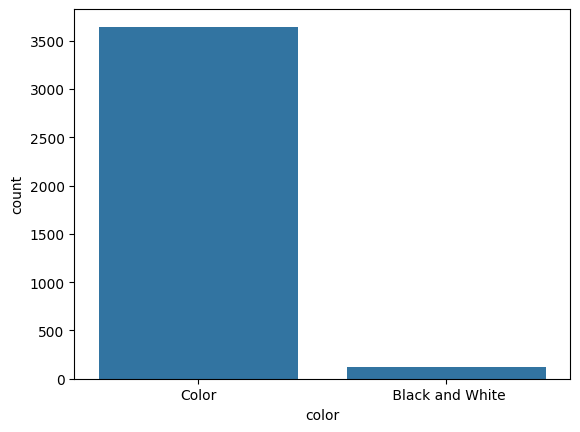

In [11]:
sns.countplot(x='color', data=dataset)

Hoeveel verschillende genres zijn er aanwezig in de dataset?

In [12]:
genres = dataset['genres'].unique()
print("er zijn", len(genres), "genres")

er zijn 17 genres


Visualiseer het aantal films per genre. Extra: lukt het jou om ze te sorteren van hoog naar laag?

<Axes: xlabel='genres', ylabel='count'>

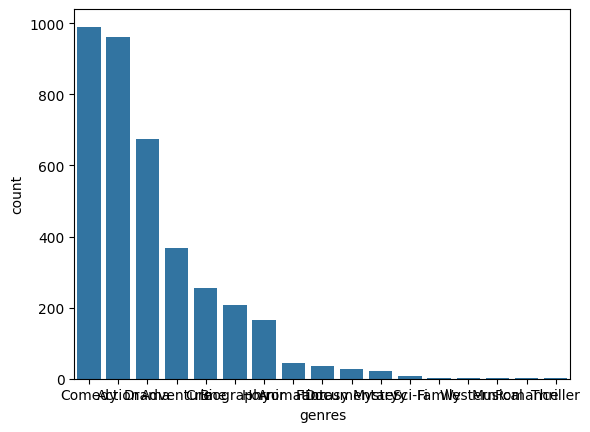

In [13]:
genres_counts = dataset['genres'].value_counts().sort_values(ascending=False)
sns.countplot(x='genres', data=dataset, order=genres_counts.index)

Wat is de hoogste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [14]:
dataset['movie_title'][dataset['imdb_score'] == dataset['imdb_score'].max()]
print(dataset['imdb_score'].max())
print(dataset['movie_title'][dataset['imdb_score'] == dataset['imdb_score'].max()])

9.3
1800    The Shawshank Redemption 
Name: movie_title, dtype: object


Wat is de laagste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [15]:
dataset['movie_title'][dataset['imdb_score'] == dataset['imdb_score'].min()]
print(dataset['imdb_score'].min())
print(dataset['movie_title'][dataset['imdb_score'] == dataset['imdb_score'].min()])



1.6
2546    Justin Bieber: Never Say Never 
Name: movie_title, dtype: object


Welke is de langste film en welke is de kortste film?

In [16]:
# langste
dataset['movie_title'][dataset['duration'] == dataset['duration'].max()]
print(dataset['duration'].max())
print(dataset['movie_title'][dataset['duration'] == dataset['duration'].max()])

330.0
1414    Blood In, Blood Out 
Name: movie_title, dtype: object


In [17]:
# langste
max_duration = dataset['duration'].max()
dataset[dataset['duration'] == max_duration]['movie_title']
print(dataset['duration'].max())
print(dataset['movie_title'][dataset['duration'] == dataset['duration'].max()])

330.0
1414    Blood In, Blood Out 
Name: movie_title, dtype: object


In [18]:
# kortste
dataset['movie_title'][dataset['duration'] == dataset['duration'].min()]
print(dataset['duration'].min())
print(dataset['movie_title'][dataset['duration'] == dataset['duration'].min()])
print(dataset['movie_title'][dataset['duration'] == dataset['duration'].min()])

37.0
3343    Evil Dead II 
Name: movie_title, dtype: object
3343    Evil Dead II 
Name: movie_title, dtype: object


Hoeveel films hebben een PG13-rating en hebben een imdb score hoger dan 8.5?

In [19]:
voorwaarde_1 = dataset['content_rating'] == "PG-13"
voorwaarde_2 = dataset['imdb_score'] >  8.5
dataset[voorwaarde_1 & voorwaarde_2].content_rating.count()

np.int64(7)

Hoeveel franstalige films zijn komedies?

In [20]:
voorwaarde_c = dataset['genres'] == 'Comedy'
voorwaarde_f = dataset['country'] == 'France'
dataset[voorwaarde_c & voorwaarde_f].content_rating.count()

np.int64(19)

Wat is de maximale imdb score van een franstalige drama film? En hoelang duurde deze film?

In [21]:
voorwaarde_genre = dataset['genres'] == 'Drama'
voorwaarde_duration  = dataset['duration'].max()
voorwaarde_f = dataset['country'] == 'France'
dataset[voorwaarde_genre & voorwaarde_f & (dataset['imdb_score'] == dataset['imdb_score'].max())]
print(dataset['duration'].max())
print(dataset['movie_title'][dataset['duration'] == dataset['duration'].max()])
print(dataset['imdb_score'].max())

330.0
1414    Blood In, Blood Out 
Name: movie_title, dtype: object
9.3


519     163.0
844     133.0
1150    206.0
1219    131.0
1253    112.0
1655    135.0
1725    118.0
1956    116.0
1980    127.0
2032    143.0
2348    161.0
2465    120.0
2468    147.0
2488    111.0
2589    112.0
2884    127.0
3158     97.0
3226    122.0
3285     93.0
3462     86.0
3498     95.0
3503     87.0
3636     88.0
3637    104.0
3765    110.0
Name: duration, dtype: float64


Verander de index van de dataframe van een getal naar de titel van de film. De documentatie van de te gebruiken functie kun je hier terug vinden: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [22]:
dataset = dataset.set_index('movie_title', drop=False)
print("\nDataframe met 'movie_title' als index:")
print(dataset.head())



Dataframe met 'movie_title' als index:
                                           color      director_name  \
movie_title                                                           
Avatar                                     Color      James Cameron   
Pirates of the Caribbean: At World's End   Color     Gore Verbinski   
Spectre                                    Color         Sam Mendes   
The Dark Knight Rises                      Color  Christopher Nolan   
John Carter                                Color     Andrew Stanton   

                                           num_critic_for_reviews  duration  \
movie_title                                                                   
Avatar                                                      723.0     178.0   
Pirates of the Caribbean: At World's End                    302.0     169.0   
Spectre                                                     602.0     148.0   
The Dark Knight Rises                                       813.0  

Sorteer van hoge omzet naar lage omzet (gross variabele). Gebruik hiervoor de sort_values functie.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
Toon de top 10

In [23]:
dataset.sort_values('gross', ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
Titanic,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000,Drama
Jurassic World,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000,Action
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,Action
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,Action
The Dark Knight,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000,Action
Star Wars: Episode I - The Phantom Menace,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1.0,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000,Action
Star Wars: Episode IV - A New Hope,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000,Action
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,Action


Maak een histogram van het aantal films volgens de imdb score. Bereken hiervoor zelf de klassenbreedte en bepaal zelf de bins

Text(0.5, 0, 'IMDB Score')

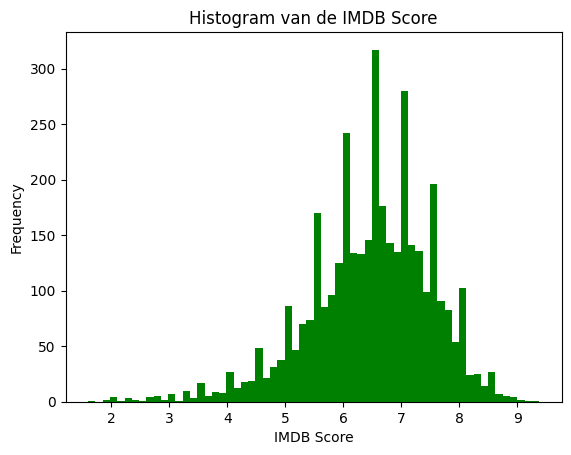

In [24]:
import matplotlib.pyplot as plt
minimum = dataset['imdb_score'].min()
maximum = dataset['imdb_score'].max()
breedte = maximum - minimum
klassenbreedte = breedte/np.sqrt(dataset.imdb_score.count())
bins = np.arange(minimum, maximum+klassenbreedte, klassenbreedte)
dataset['imdb_score'].plot(kind='hist', bins=bins,color='green')
plt.title('Histogram van de IMDB Score')
plt.xlabel('IMDB Score')

Het aantal facebook likes blijkt voor de klant toch niet relevant te zijn, verwijder alle kolommen waar facebook_likes in voorkomt.

In [25]:
dataset = dataset.drop('actor_1_facebook_likes',axis=1)
dataset = dataset.drop('actor_2_facebook_likes',axis=1)
dataset = dataset.drop('actor_3_facebook_likes',axis=1)
dataset = dataset.drop('cast_total_facebook_likes',axis=1)
dataset = dataset.drop('movie_facebook_likes',axis=1)


Momenteel staan de opbrengst (gross) en het budget nog in dollars, maar de klant zou dit graag in euro's weergeven willen zien. Bewerk de kolommen naar het gevraagde format (voeg niet een nieuwe kolom toe, maar bewerk rechtsreeks de kolom) (1 amerikaanse dollar = 0.86 euro)

In [26]:
dataset['gross'] = dataset.gross *0.86
dataset['budget'] = dataset.budget *0.86

De hoeveelheid winst (of verlies) van een film is niet in de dataset te vinden maar valt eenvoudig te berekenen door van de opbrengst de kosten af te trekken. Met andere woorden: $gross-budget$. Deze berekende winst voegen we toe aan onze dataset als volgt: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

In [27]:
dataset['profit'] = dataset['gross'] - dataset['budget']

Welke is de meest verlieslatende film en welke de meest winstgevende?

In [28]:
voorwaarde_g = dataset['movie_title']
dataset[voorwaarde_g == dataset['profit'].min()]
print(dataset['profit'].min())
print(dataset['movie_title'][dataset['profit'] == dataset['profit'].min()])


-10503436785.68
movie_title
The Host     The Host 
Name: movie_title, dtype: object


In [29]:
voorwaarde_m = dataset['movie_title']
dataset[voorwaarde_m == dataset['profit'].max()]
print(dataset['profit'].max())
print(dataset['movie_title'][dataset['profit'] == dataset['profit'].max()])

450215028.41999996
movie_title
Avatar     Avatar 
Name: movie_title, dtype: object


Goede vraag! Laten we de laatste regel ontleden:

python
Copy
Edit
print(dataset['movie_title'][dataset['profit'] == dataset['profit'].max()])
🔍 Wat gebeurt hier?
dataset['profit'] == dataset['profit'].max()
➤ Dit maakt een booleanserie (True/False) die True is voor de rij met de hoogste winst.

dataset['movie_title'][...]
➤ Dit selecteert de filmnaam (movie_title) voor de rij waar die voorwaarde True is.

print(...)
➤ Print de titel(s) van de film(en) met de hoogste winst.

🔁 Equivalent in stappen:
python
Copy
Edit
max_profit = dataset['profit'].max()
film_met_max_winst = dataset[dataset['profit'] == max_profit]['movie_title']
print(film_met_max_winst)
🧠 Waarom handig?
Deze aanpak is een snelle manier om een specifieke rij of kolomwaarde te vinden op basis van een voorwaarde, zonder dat je een nieuwe variabele hoeft aan te maken.



In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3770 entries, Avatar  to My Date with Drew 
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   color                    3770 non-null   object 
 1   director_name            3770 non-null   object 
 2   num_critic_for_reviews   3770 non-null   float64
 3   duration                 3770 non-null   float64
 4   director_facebook_likes  3770 non-null   float64
 5   actor_2_name             3770 non-null   object 
 6   gross                    3770 non-null   float64
 7   actor_1_name             3770 non-null   object 
 8   movie_title              3770 non-null   object 
 9   num_voted_users          3770 non-null   int64  
 10  actor_3_name             3770 non-null   object 
 11  facenumber_in_poster     3770 non-null   float64
 12  num_user_for_reviews     3770 non-null   float64
 13  language                 3769 non-null   object 
 14  country  

Iemand beweert dat Sci-Fi films winstgevender zijn dan horror films. Klopt deze bewering? Gebruik de boxplot om je antwoord te staven.

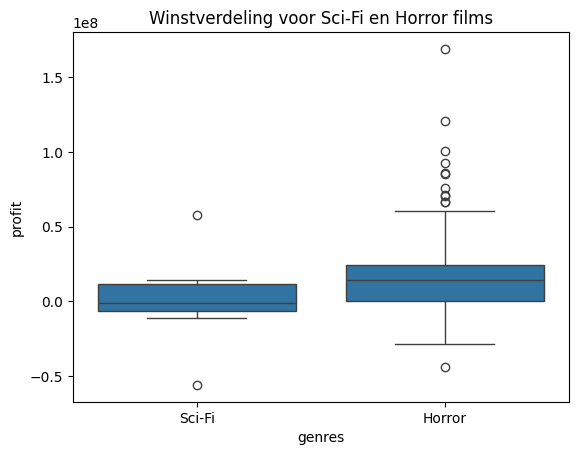

In [34]:
filtered = dataset[dataset['genres'].isin(['Sci-Fi', 'Horror'])]
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='genres', y='profit', data=filtered)
plt.title('Winstverdeling voor Sci-Fi en Horror films')
plt.show()


Probleem in je regel:
python
Copy
Edit
genres = dataset['genres'] == 'Sci-Fi','Horror'
Dit maakt een tuple, wat niet correct is voor filtering.

Je wil films selecteren waarvan het genre 'Sci-Fi' of 'Horror' is.

Oplossing:
Gebruik isin() voor meerdere waarden:

python
Copy
Edit
filtered = dataset[dataset['genres'].isin(['Sci-Fi', 'Horror'])]

Is de winst normaalverdeeld?

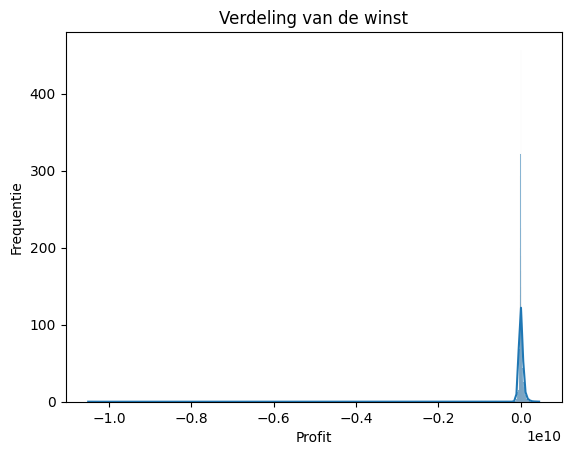

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['profit'], kde=True)
plt.title('Verdeling van de winst')
plt.xlabel('Profit')
plt.ylabel('Frequentie')
plt.show()


In [36]:
mean = dataset['profit'].mean()
skew = dataset['profit'].skew()
kurtosis = dataset['profit'].kurtosis()
mode = dataset['profit'].mode()
print('Mean: ',mean)
print('Skew: ',skew)
print('Kurtosis: ',kurtosis)
print('Mode: ',mode)



Mean:  5450283.982546418
Skew:  -42.60856156996883
Kurtosis:  2172.4114454531395
Mode:  0   -98930256.52
1   -29434773.66
2     9504083.60
3    17802000.00
4    36415560.50
5    40162000.00
6    91600586.60
Name: profit, dtype: float64


winst is niet normaal verdeeld

Bepaal de uitschieters bij de winst. Welke film brachten een extreem grote winst met zich mee en welke een extreem groot verlies?
Bereken de uitschieters op twee mogelijke manieren:
1. Via de interkwartielafstand: uitschieters zijn waarden die groter zijn dan Q3 + 1,5 keer de interkwartielafstand of kleiner zijn dan Q1- 1,5 keer de interkwartielafstand.
2. Via de standaardafwijking: waarden die meer dan 3 standaardafwijken van het gemiddelde gelegen zijn. Dus waarden groter dan gemiddelde + 3 keer de std.afw en waarden kleiner dan het gemiddelde - 3 keer de standaardafwijking.

In [38]:
# Bereken kwartielen
Q1 = dataset['profit'].quantile(0.25)
Q3 = dataset['profit'].quantile(0.75)

# Interkwartielafstand (IQR)
IQR = Q3 - Q1

# Uitschieters volgens de 1.5 * IQR regel
uitschieters = dataset[(dataset['profit'] > Q3 + 1.5 * IQR) | (dataset['profit'] < Q1 - 1.5 * IQR)]

# Printen
print('Q3 (bovenste kwartiel):', Q3)
print('Q1 (onderste kwartiel):', Q1)
print('IQR:', IQR)
print('Aantal uitschieters:', len(uitschieters))
print(uitschieters[['movie_title', 'profit']])


Q3 (bovenste kwartiel): 22106978.755
Q1 (onderste kwartiel): -9021793.02
IQR: 31128771.775
Aantal uitschieters: 402
                                                                                          movie_title  \
movie_title                                                                                             
Avatar                                                                                        Avatar    
The Dark Knight Rises                                                          The Dark Knight Rises    
John Carter                                                                              John Carter    
Avengers: Age of Ultron                                                      Avengers: Age of Ultron    
Batman v Superman: Dawn of Justice                                Batman v Superman: Dawn of Justice    
Pirates of the Caribbean: Dead Man's Chest                Pirates of the Caribbean: Dead Man's Chest    
The Lone Ranger                             

Je zit heel dicht bij de juiste aanpak, maar er is één kleine fout: je gebruikt quantile([0.75]) en quantile([0.25]), wat een Series teruggeeft met indexen, niet een enkel getal. Daardoor werkt je berekening wél, maar geeft het rare structuren.

In [40]:
# Bereken grenswaarden
standaardafwijking = dataset['profit'].std()
gemiddelde = dataset['profit'].mean()

boven_grens = gemiddelde + 3 * standaardafwijking
onder_grens = gemiddelde - 3 * standaardafwijking

# Filter volledige dataset zonder uitschieters
dataset_zonder_outliers = dataset[(dataset['profit'] >= onder_grens) & (dataset['profit'] <= boven_grens)]

# Controle
print('Originele aantal rijen:', len(dataset))
print('Zonder uitschieters:', len(dataset_zonder_outliers))


Originele aantal rijen: 3770
Zonder uitschieters: 3761


Verwijder de uitschieters gevonden via de standaardafwijking uit de dataset.